Initial Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB
None

Model Performance:
Mean Squared Error (MSE): 4766908188.85
Root Mean Squared Error (RMSE): 69042.80
R² Score: 0.65


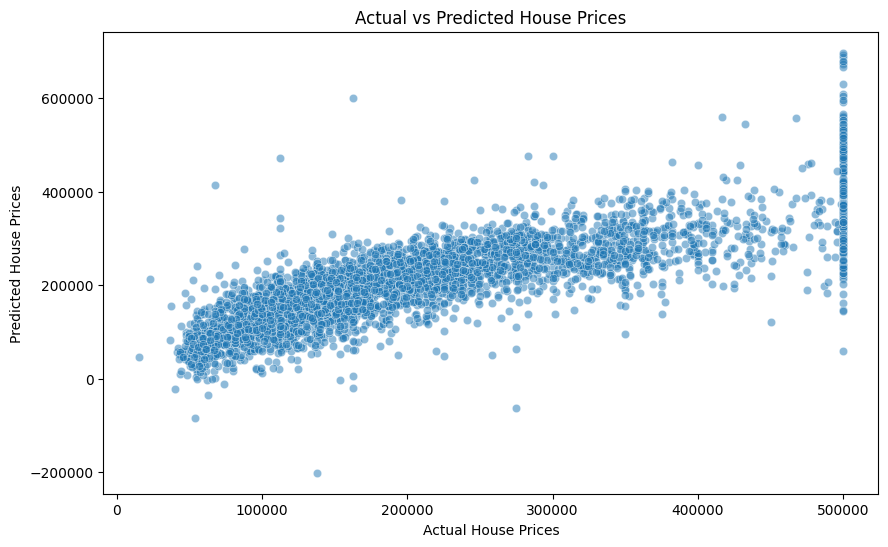

In [4]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split  # Correct import
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = 'housing.csv'  # Adjust if needed
data = pd.read_csv(file_path)

# Display initial dataset summary
print("Initial Dataset Overview:")
print(data.info())

# Step 1: Drop rows with missing values
data.dropna(inplace=True)

# Step 2: Feature Engineering
# Add new features based on existing ones
data['rooms_per_household'] = data['total_rooms'] / data['households']
data['bedrooms_per_room'] = data['total_bedrooms'] / data['total_rooms']
data['population_per_household'] = data['population'] / data['households']

# Step 3: Prepare Features and Target
# Select features (excluding 'ocean_proximity' initially)
features = [
    'longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms',
    'population', 'households', 'median_income', 'rooms_per_household',
    'bedrooms_per_room', 'population_per_household'
]
X = data[features]
y = data['median_house_value']

# One-Hot Encode 'ocean_proximity' and merge it into features
X = pd.concat([X, pd.get_dummies(data['ocean_proximity'], drop_first=True)], axis=1)

# Step 4: Split the dataset using train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Train the Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)

# Step 6: Evaluate the Model
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("\nModel Performance:")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R² Score: {r2:.2f}")

# Step 7: Visualize Predicted vs Actual Values
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.5)
plt.title("Actual vs Predicted House Prices")
plt.xlabel("Actual House Prices")
plt.ylabel("Predicted House Prices")
plt.show()


In [6]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = 'housing.csv'
data = pd.read_csv(file_path)

# Handle missing values (drop rows with missing values)
data.dropna(inplace=True)

# Feature Engineering
data['rooms_per_household'] = data['total_rooms'] / data['households']
data['bedrooms_per_room'] = data['total_bedrooms'] / data['total_rooms']
data['population_per_household'] = data['population'] / data['households']

# Select features and target
features = [
    'longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms',
    'population', 'households', 'median_income', 'rooms_per_household',
    'bedrooms_per_room', 'population_per_household'
]
X = data[features]
y = data['median_house_value']

# One-Hot Encode 'ocean_proximity' and merge it into features
X = pd.concat([X, pd.get_dummies(data['ocean_proximity'], drop_first=True)], axis=1)

# Step 1: Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 2: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Step 3: Train a Ridge Regression Model
ridge_model = Ridge(alpha=1.0)  # Regularization strength
ridge_model.fit(X_train, y_train)

# Step 4: Evaluate the Model
y_pred = ridge_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("\nModel Performance:")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R² Score: {r2:.2f}")

# Visualize Predicted vs Actual Values
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.5)
plt.title("Actual vs Predicted House Prices")
plt.xlabel("Actual House Prices")
plt.ylabel("Predicted House Prices")
plt.show()


KeyError: "['rooms_per_household', 'bedrooms_per_room', 'population_per_household'] not in index"